In [62]:
import numpy as np
import matplotlib.pyplot as plt
import glob

In [94]:
dataDir = 'c:/Users/llave/Documents/CMS/data/'
muons = np.load(dataDir+'truthMuons_recoFailed.npz', allow_pickle=True)
bkg_files = glob.glob(dataDir+'images_DYJetsToLL_v5_muonsV2/*.root.npz')
bkg, bkg_infos = None, None
for file in bkg_files[:50]:
    infile = np.load(file, allow_pickle=True)['background']
    if bkg is None: bkg = infile
    else: bkg = np.vstack((bkg,infile))
    infile = np.load(file, allow_pickle=True)['background_info']
    if bkg_infos is None: bkg_infos = infile
    else: bkg_infos = np.vstack((bkg_infos,infile))
print(muon_failures['sets'].shape)
print(bkg.shape)
background = {'sets':bkg, 'infos':bkg_infos}

(195, 100, 4)
(375317, 100, 4)


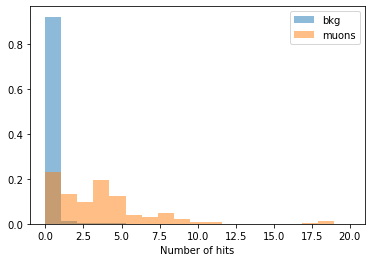

In [95]:
def count_hits_per_event(events):
    array = []
    for event in events:
        nParticles = 0
        for n,hit in enumerate(event):
            if(hit[2] == 0): 
                nParticles = n
                break
        array.append(nParticles)
    return array

_ = plt.hist(count_hits_per_event(background['sets']),bins=np.linspace(0,20,20),alpha=0.5,density=True,label="bkg")
_ = plt.hist(count_hits_per_event(muons['sets']),bins=np.linspace(0,20,20),alpha=0.5,density=True,label="muons")

plt.xlabel("Number of hits")
plt.legend()
# plt.yscale('log')

In [78]:
dEtas, dPhis = [], []
etas, phis = [], []
stations = []
times = []
for event, info in zip(muons['sets'],muons['infos']):
    for hit in event:
        if np.sum(hit) == 0: continue
        dEtas.append(hit[0])
        dPhis.append(hit[1])
        stations.append(hit[2])
        times.append(hit[3])
    etas.append(info[8])
    phis.append(info[9])

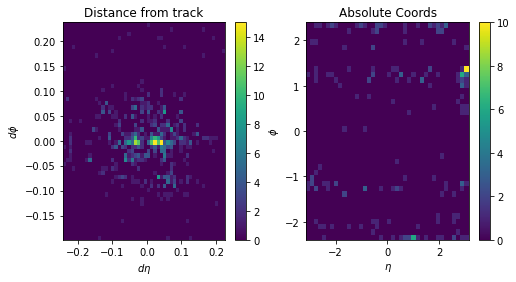

In [103]:
fig, ax = plt.subplots(1,2, figsize=(8, 4))

im0 = ax[0].hist2d(dPhis,dEtas,bins=50)
ax[0].set_title("Distance from track")
ax[0].set_xlabel(r"$d\eta$")
ax[0].set_ylabel(r"$d\phi$")
fig.colorbar(im0[3], ax=ax[0])

im1 = ax[1].hist2d(phis,etas,bins=40)
ax[1].set_title("Absolute Coords")
ax[1].set_xlabel(r"$\eta$")
ax[1].set_ylabel(r"$\phi$")
fig.colorbar(im1[3], ax=ax[1])

In [80]:
dEtasB, dPhisB = [], []
etasB, phisB = [], []
stationsB = []
timesB = []
for event, info in zip(background['sets'],background['infos']):
    for hit in event:
        if np.sum(hit) == 0: continue
        dEtasB.append(hit[0])
        dPhisB.append(hit[1])
        stationsB.append(hit[2])
        timesB.append(hit[3])
    etasB.append(info[8])
    phisB.append(info[9])

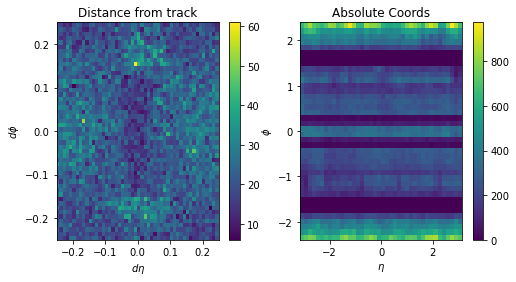

In [104]:
fig, ax = plt.subplots(1,2, figsize=(8, 4))

im0 = ax[0].hist2d(dPhisB,dEtasB,bins=50)
ax[0].set_title("Distance from track")
ax[0].set_xlabel(r"$d\eta$")
ax[0].set_ylabel(r"$d\phi$")
fig.colorbar(im0[3], ax=ax[0])

im1 = ax[1].hist2d(phisB,etasB,bins=40)
ax[1].set_title("Absolute Coords")
ax[1].set_xlabel(r"$\eta$")
ax[1].set_ylabel(r"$\phi$")
fig.colorbar(im1[3], ax=ax[1])

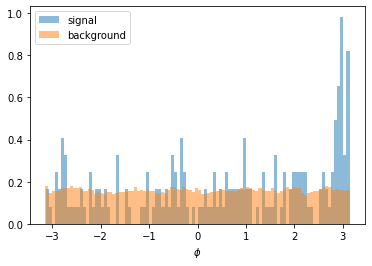

In [83]:
_ = plt.hist(phis, bins=100,label='signal',alpha=0.5,density=True)
_ = plt.hist(phisB, bins=100,label='background',alpha=0.5,density=True)
plt.xlabel(r"$\phi$")
plt.legend()

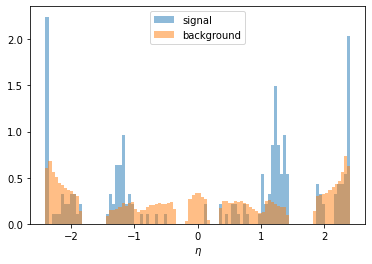

In [84]:
_ = plt.hist(etas, bins=100,label='signal',alpha=0.5,density=True)
_ = plt.hist(etasB, bins=100,label='background',alpha=0.5,density=True)
plt.xlabel(r"$\eta$")
plt.legend()

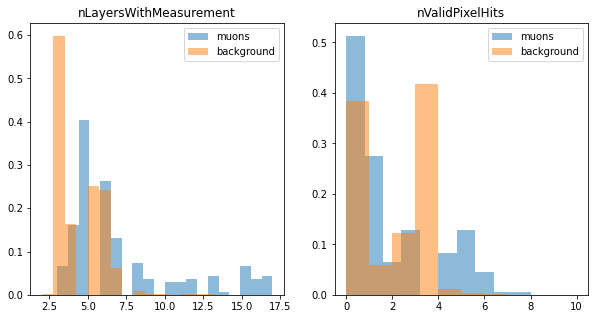

In [85]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
h0 = ax[0].hist(muon_failures['infos'][:,11],alpha=0.5,density=True,label="muons",bins=20)
h0_2 = ax[0].hist(bkg_infos[:,11],alpha=0.5,density=True,label="background",bins=20)
ax[0].set_title("nLayersWithMeasurement")
ax[0].legend()
h0 = ax[1].hist(muon_failures['infos'][:,12],alpha=0.5,density=True,label="muons",bins=10)
h0_2 = ax[1].hist(bkg_infos[:,12],alpha=0.5,density=True,label="background",bins=10)
ax[1].set_title("nValidPixelHits")
ax[1].legend()

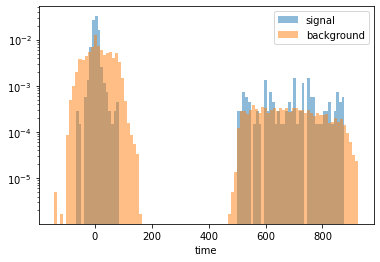

In [90]:
_ = plt.hist(times, bins=100,label='signal',alpha=0.5,density=True)
_ = plt.hist(timesB, bins=100,label='background',alpha=0.5,density=True)
plt.xlabel("time")
plt.legend()
plt.yscale("log")

In [96]:
hcal_sum, hcal_nhits, ecal_sum, ecal_nhits = [],[],[],[]
for event in muon_failures['infos']:
    hcal_sum.append(np.sum(event[-1]))
    hcal_nhits.append(len(event[-1]))
    ecal_sum.append(np.sum(event[-2]))
    ecal_nhits.append(len(event[-2]))
    
hcal_sumB, hcal_nhitsB, ecal_sumB, ecal_nhitsB = [],[],[],[]
for event in background['infos']:
    hcal_sumB.append(np.sum(event[-1]))
    hcal_nhitsB.append(len(event[-1]))
    ecal_sumB.append(np.sum(event[-2]))
    ecal_nhitsB.append(len(event[-2]))

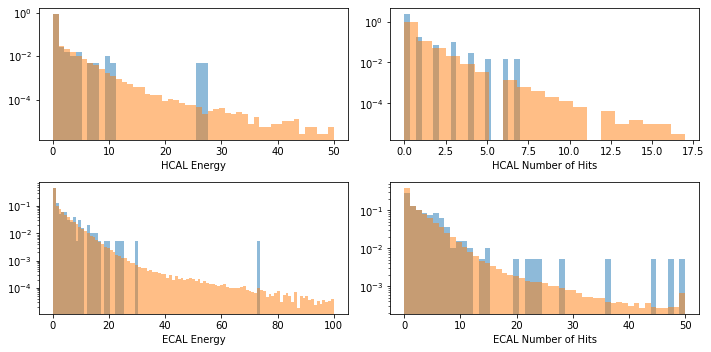

In [102]:
fig, ax = plt.subplots(2, 2, figsize=(10,5))
h0 = ax[0,0].hist(hcal_sum,bins=np.linspace(0,50,50),alpha=0.5,density=True)
h0_2 = ax[0,0].hist(hcal_sumB,bins=np.linspace(0,50,50),alpha=0.5,density=True)
ax[0,0].set_xlabel("HCAL Energy")
ax[0,0].set_yscale("log")
h1 = ax[1,0].hist(ecal_sum,bins=np.linspace(0,100,100),alpha=0.5,density=True)
h1_2 = ax[1,0].hist(ecal_sumB,bins=np.linspace(0,100,100),alpha=0.5,density=True)
ax[1,0].set_xlabel("ECAL Energy")
ax[1,0].set_yscale("log")
h2 = ax[0,1].hist(hcal_nhits,bins=20,alpha=0.5,density=True)
h2_2 = ax[0,1].hist(hcal_nhitsB,bins=20,alpha=0.5,density=True)
ax[0,1].set_xlabel("HCAL Number of Hits")
ax[0,1].set_yscale("log")
h3 = ax[1,1].hist(ecal_nhits,bins=np.linspace(0,50,50),alpha=0.5,density=True)
h3_2 = ax[1,1].hist(ecal_nhitsB,bins=np.linspace(0,50,50),alpha=0.5,density=True)
ax[1,1].set_xlabel("ECAL Number of Hits")
ax[1,1].set_yscale("log")
fig.tight_layout()